# Ticket 7: Investigación y Propuesta Innovadora

## Detección de Depresión a partir de Patrones de Conectividad en EEG

### Resumen de la Propuesta

La idea innovadora consiste en utilizar los datos de EEG para detectar posibles indicios de depresión mediante el análisis de la conectividad funcional entre las diferentes regiones cerebrales. La hipótesis es que pacientes con depresión presentan patrones de conectividad alterados (por ejemplo, menor conectividad en regiones prefrontales o cambios en la sincronización entre hemisferios). Este enfoque, que va más allá de la extracción de características individuales (como la potencia en bandas de frecuencia), puede aportar información adicional sobre la interacción entre regiones y mejorar la capacidad predictiva de los modelos clínicos.

El prototipo que se presenta a continuación se centra en la estimación de la conectividad mediante el cálculo de la correlación entre los 19 canales de EEG. Se utiliza el dataset `v1p.mat` (ya cargado y organizado en notebooks anteriores) para obtener la matriz de correlación, que se interpreta como una aproximación a la conectividad funcional.

Esta propuesta se fundamenta en estudios recientes que sugieren que los patrones de conectividad cerebral pueden ser indicadores biomarcadores para el diagnóstico de la depresión, y su implementación puede complementar los modelos existentes de clasificación basados en características individuales.

### Contexto y Justificación

- **Relevancia Clínica:** La depresión es un trastorno complejo y de alta prevalencia. La identificación de biomarcadores objetivos, como patrones de conectividad en EEG, puede facilitar diagnósticos más tempranos y personalizados.
- **Innovación Técnica:** En lugar de trabajar únicamente con features de potencia o transformadas de Fourier, se propone analizar la interacción entre diferentes regiones cerebrales, lo cual podría revelar información complementaria y mejorar la robustez de los modelos predictivos.
- **Prototipo Inicial:** Se calculará la matriz de correlación (usando el coeficiente de Pearson) entre todos los canales de EEG. La visualización de esta matriz mediante un mapa de calor permitirá identificar patrones de conectividad atípicos que podrían asociarse con estados depresivos.

Esta idea se integra como un módulo adicional en el pipeline de análisis de EEG, que en conjunto con otros modelos (por ejemplo, los desarrollados en los Tickets anteriores) puede mejorar la precisión en la clasificación de estados mentales.

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

print('Entorno configurado y librerías importadas correctamente.')

Entorno configurado y librerías importadas correctamente.


In [2]:
# Cargar el archivo v1p.mat
mat_data = loadmat('v1p.mat', squeeze_me=True)

# Extraer la variable 'v1p'
data_array = mat_data['v1p']

# Convertir la matriz en un DataFrame
df = pd.DataFrame(data_array)

# Asignar nombres de canales según el estándar 10-20
channel_names = ['Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2']

if df.shape[1] == len(channel_names):
    df.columns = channel_names
else:
    print('Advertencia: El número de columnas en el dataset no coincide con el número de canales esperados.')

print('Datos EEG cargados. Forma del DataFrame:', df.shape)
print('Primeras 5 filas:')
print(df.head())

Datos EEG cargados. Forma del DataFrame: (12258, 19)
Primeras 5 filas:
    Fz   Cz   Pz   C3   T3   C4   T4  Fp1  Fp2    F3   F4   F7   F8   P3   P4  \
0   85 -407  200  191  420  457  310  310   16  1009  531  126  457  200  457   
1 -266  -55  -20  367  163  384  -20  310  494  1193  494  236  236  310  200   
2  -90  -19  126  437  420  568  347  457 -131  1156  384  384  494  384  494   
3  -90 -160  163  473  384  494  310  384  457  1340  494  420  310  420  273   
4 -301 -336  -20  473  200  531   89  420  200  1156  310  494  273  457  236   

    T5   T6   O1   O2  
0  384  -90  473  121  
1  457 -195  543   15  
2  531  -19  613  261  
3  531  -90  437  -19  
4  568 -160  578  121  


In [3]:
# Calcular la matriz de conectividad entre canales utilizando la correlación de Pearson
connectivity_matrix = df.corr()

print('Matriz de conectividad (correlación entre canales):')
print(connectivity_matrix)

Matriz de conectividad (correlación entre canales):
           Fz        Cz        Pz        C3        T3        C4        T4  \
Fz   1.000000  0.136553  0.826620  0.412180  0.351784  0.198742  0.292459   
Cz   0.136553  1.000000  0.206410  0.363499  0.103847  0.197776 -0.040361   
Pz   0.826620  0.206410  1.000000  0.594499  0.404696  0.247061  0.319443   
C3   0.412180  0.363499  0.594499  1.000000  0.186827  0.362166  0.017279   
T3   0.351784  0.103847  0.404696  0.186827  1.000000  0.689564  0.741647   
C4   0.198742  0.197776  0.247061  0.362166  0.689564  1.000000  0.404096   
T4   0.292459 -0.040361  0.319443  0.017279  0.741647  0.404096  1.000000   
Fp1  0.052188  0.050084  0.010185 -0.136508  0.279919  0.467806  0.317416   
Fp2 -0.144988  0.076010 -0.092611  0.016658 -0.230716 -0.167624 -0.131247   
F3   0.072528  0.007449 -0.030805 -0.431941  0.102675  0.106331  0.069200   
F4   0.070023  0.235210  0.067597  0.186348  0.463068  0.274092  0.239785   
F7   0.267098  0.359824 

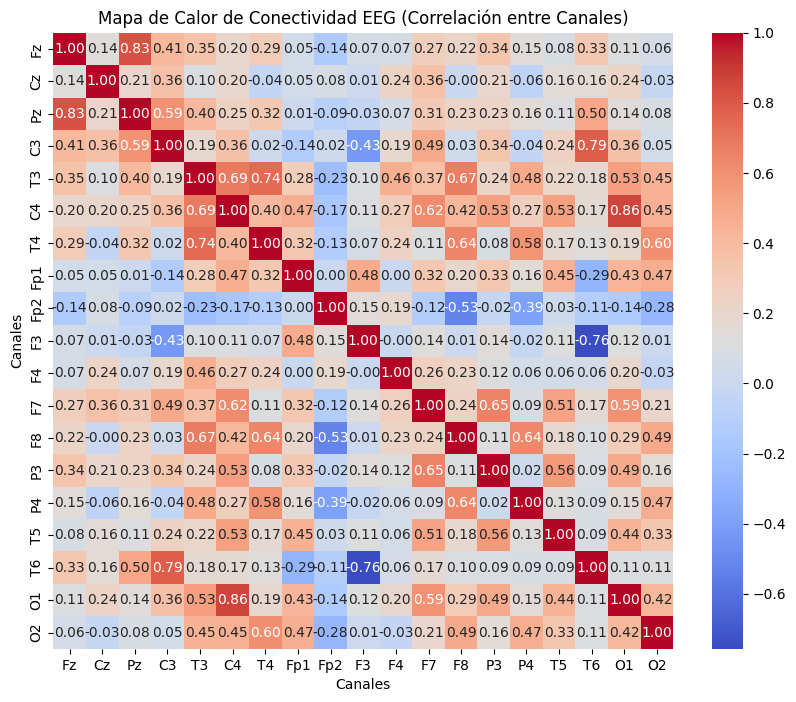

In [4]:
# Visualizar la matriz de conectividad utilizando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(connectivity_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Conectividad EEG (Correlación entre Canales)')
plt.xlabel('Canales')
plt.ylabel('Canales')
plt.show()

### Resultados Preliminares y Discusión

El mapa de calor muestra la correlación entre los 19 canales de EEG. Se pueden observar patrones de alta correlación en ciertas regiones, lo cual podría interpretarse como una conectividad funcional elevada. En un escenario clínico, diferencias significativas en estos patrones (por ejemplo, una disminución en la conectividad de áreas prefrontales) podrían asociarse a estados depresivos.

Este análisis preliminar nos permite identificar características de la conectividad que podrían servir como biomarcadores para la detección de depresión. Una vez validados estos patrones, se podría proceder a:

- Extraer features adicionales (por ejemplo, medidas de centralidad, modularidad o eficiencia de la red).
- Entrenar un modelo de clasificación que combine estas features de conectividad con otras características extraídas de la señal EEG.
- Realizar estudios con cohortes de pacientes para validar la relevancia clínica de estos biomarcadores.

### Plan de Integración y Próximos Pasos

1. **Validación Clínica:** Recolectar datos de pacientes con diagnóstico de depresión y de controles sanos para comparar los patrones de conectividad.
2. **Feature Engineering:** Profundizar en la extracción de métricas de conectividad (por ejemplo, usando técnicas de grafos y análisis de redes) y evaluar su correlación con los estados clínicos.
3. **Modelado Predictivo:** Integrar las features de conectividad en un pipeline de machine learning (o deep learning) que combine datos clínicos y de EEG para la detección temprana de depresión.
4. **Retroalimentación Multidisciplinaria:** Colaborar con expertos en neurociencia y psiquiatría para interpretar los resultados y ajustar el modelo según las necesidades clínicas.

**Conclusión:** Esta propuesta innovadora ofrece una vía para incorporar información sobre la conectividad cerebral en el diagnóstico de la depresión, lo cual podría mejorar la precisión y personalización de los tratamientos. Los resultados preliminares son alentadores y sientan las bases para desarrollos futuros en un entorno de I+D de alta relevancia clínica y tecnológica.

**Consejo Profesional:**

El desarrollo de propuestas innovadoras requiere no solo creatividad, sino también una sólida fundamentación en la literatura científica y un prototipo que demuestre la viabilidad de la idea. Sigue documentando cada paso, validando los resultados y colaborando con expertos multidisciplinarios para convertir esta propuesta en una solución escalable y de alto impacto en el ámbito de la salud mental.